## Cospectra of light curves

### The cospectrum is the real part of the cross spectrum 


### Reference:
##### 1)On the Statistical Properties of Cospectra - https://iopscience.iop.org/article/10.3847/1538-4365/aabe38

##### 2) https://github.com/dhuppenkothen/cospectra-paper 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from stingray import Lightcurve, Crossspectrum
import matplotlib.pyplot as plt
np.random.seed(42)
time = np.linspace(0, 10, 1000)

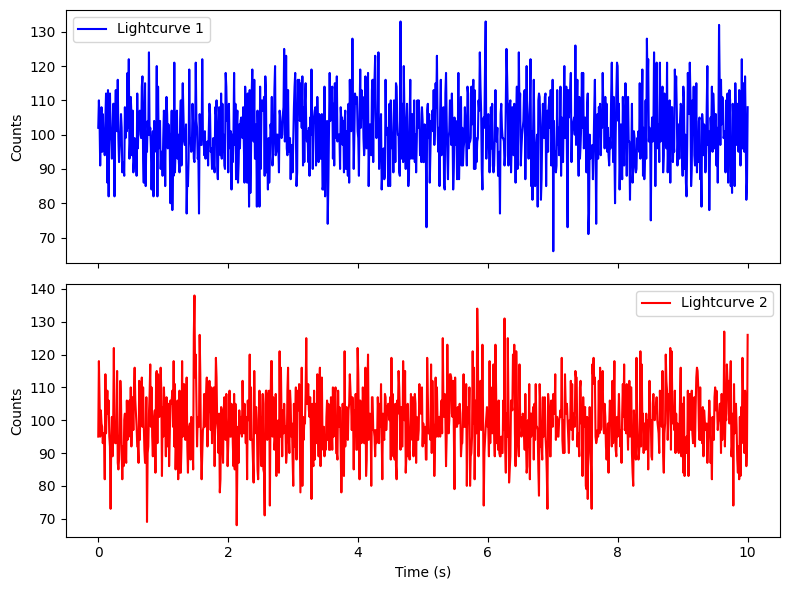

In [36]:
counts1 = np.random.poisson(lam=100, size=len(time))
counts2 = np.random.poisson(lam=100, size=len(time))

# Create light curves
lc1 = Lightcurve(time, counts1)
lc2 = Lightcurve(time, counts2)

# Create subplots
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))

# Plot each light curve on its own subplot
ax[0].plot(lc1.time, lc1.counts, color="b", label="Lightcurve 1")
ax[0].set_ylabel("Counts")
ax[0].legend()

ax[1].plot(lc2.time, lc2.counts, color="r", label="Lightcurve 2")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Counts")
ax[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

/home/saurav/.local/lib/python3.12/site-packages/stingray/fourier.py:1134: UserWarning: n_ave is below 30. Please note that the error bars on the quantities derived from the cross spectrum are only reliable for a large number of averaged powers.
  warnings.warn(
/home/saurav/.local/lib/python3.12/site-packages/stingray/fourier.py:1161: RuntimeWarning: invalid value encountered in sqrt
  dphi = np.sqrt((1 - gsq) / (2 * gsq * n_ave))


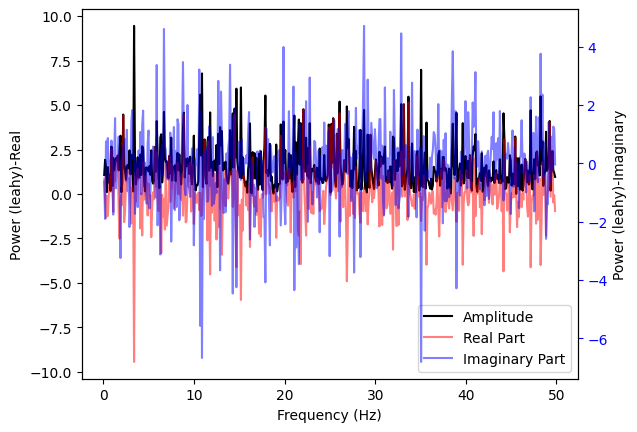

In [37]:
# calculating the crossspectrum
cs = Crossspectrum(lc1, lc2, norm="leahy")
cs.plot()
plt.show()


In [38]:
#real part of crossspectra
cospectrum = cs.power.real


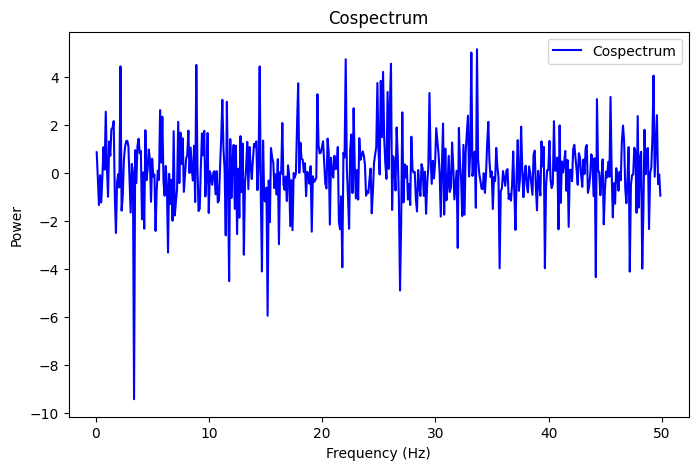

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(cs.freq, cospectrum, label="Cospectrum", color="b")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Cospectrum")
plt.legend()
plt.show()

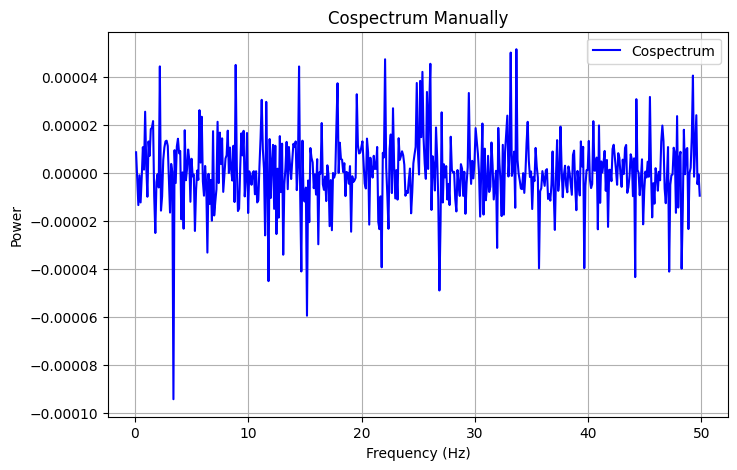

In [40]:
# Now calculating it manually for verification
#starting from crosspsectrum
from scipy.fft import fft,fftfreq

fourier1 = fft(lc1.counts)
fourier2 = fft(lc2.counts)

# Compute frequencies
freqs = fftfreq(len(time), d=lc1.dt)

# Compute cross-spectrum
cross_spec = fourier1 * np.conj(fourier2)
cospec = np.real(cross_spec)  # Extract Cospectrum (Real part)

# Apply Leahy normalization
N1 = np.sum(lc1.counts)  
N2 = np.sum(lc2.counts)  


norm_factor = (2 / (N1 * N2))
cospec *= norm_factor


positive_freqs = freqs > 0
plt.figure(figsize=(8, 5))
plt.plot(freqs[positive_freqs], cospec[positive_freqs], color='b', label="Cospectrum")


plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Cospectrum Manually")
plt.legend()
plt.grid()
plt.show()

